# Проектирование признаков разведывательного анализа данных на примере датасета болезней сердца

Датасет, с которым мы будем работать, можно скачать [здесь](https://lms.skillfactory.ru/assets/courseware/v1/4c039196d06f012765bcd040c5ed6631/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/heart.zip)

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Данный датасет содержит следующие признаки:

* **age** — возраст
* **sex** — пол (1 - мужчина, 0 - женщина)
* **cp** — тип боли в груди (4 значения)
* **trestbps** — артериальное давление в покое
* **chol** — холестерин сыворотки в мг/дл
* **fbs** — уровень сахара в крови натощак > 120 мг/дл
* **restecg** — результаты электрокардиографии в покое (значения 0,1,2)
* **thalach** — достигнута максимальная частота сердечных сокращений
* **exang** — стенокардия, вызванная физической нагрузкой
* **oldpeak** — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
* **slope** — наклон пикового сегмента ST при нагрузке
* **ca** — количество крупных сосудов (0-3), окрашенных при флюроскопии
* **thal** — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [2]:
# импортируем необходиые библиотеки
import numpy as np
import pandas as pd
# прочитаем первые 5 строк нашего датасета
heart = pd.read_csv('data\heart.zip')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Создадим новый признак old, где 1 — при возрасте пациента более 60 лет.

In [3]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [4]:
# Выясним, сколько в нашем датасете пациентов в возрасте более 60 лет:
heart['old'].sum()

79

Создадим новый признак *trestbps_mean*, который будет обозначать норму давления в среднем для его возраста и пола. *trestbps* — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмьмем из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

In [5]:
def get_trestbps_mean(row):
    if row['sex'] == 1:
        if row['age'] < 21:
            return '123'
        elif 20 < row['age'] < 31:
            return '126'
        elif 30 < row['age'] < 41:
            return '129'
        elif 40 < row['age'] < 51:
            return '135'
        elif 50 < row['age'] < 61:
            return '142'
        else:
            return '142'
    else:
        if row['age'] < 21:
            return '116'
        elif 20 < row['age'] < 31:
            return '120'
        elif 30 < row['age'] < 41:
            return '127'
        elif 40 < row['age'] < 51:
            return '137'
        elif 50 < row['age'] < 61:
            return '144'
        else:
            return '159'
heart['trestbps_mean'] = heart[['age', 'sex']].apply(get_trestbps_mean, axis=1)

In [12]:
# узнаем значение признака trestbps_mean для пациента под номером 300.
int(heart.loc[300, 'trestbps_mean'])

142

Проанализируем наш датасет и получим следующие категориальные признаки: 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'.

Вышеперечисленные категориальные признаки уже представлены в числовом виде. Если внимательно присмотреться к ним, то можно заметить те признаки, которые нуждаются в дополнительном кодировании значений (например, OneHotEncoding).

Такими категориальными признаками являются: 'cp', 'restecg', 'slope', 'ca', 'thal'.

Закодируем вышеперечисленные признаки методом OneHotEncoding, удалив исходные признаки, и посчитаем, сколько признаков получилось в датасете.

In [90]:
# импортируем необходиые библиотеки
import numpy as np
import pandas as pd

# прочитаем наш датасет
heart = pd.read_csv('data\heart.zip')
# добавляем признак как делали выше
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
# импортируем для работы с кодировщиком
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
cols = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
df_cod = pd.concat([heart, cols], axis=1)
# удаляем исходные признаки
df_cod.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis= 1, inplace=True,)

len(list(df_cod.reset_index().columns)) 

30

In [91]:
df_cod

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,1,1,0,0,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,1,0,0,0,0,0,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,...,1,0,0,1,0,0,0,0,1,0


Теперь нормализуем все числовые признаки подходящим способом. Для необработанных данных в нашем случае следует использовать RobustScaler.

В ответе напишем стандартное отклонение признака chol, округлив до шести знаков после запятой.

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='chol', ylabel='Density'>

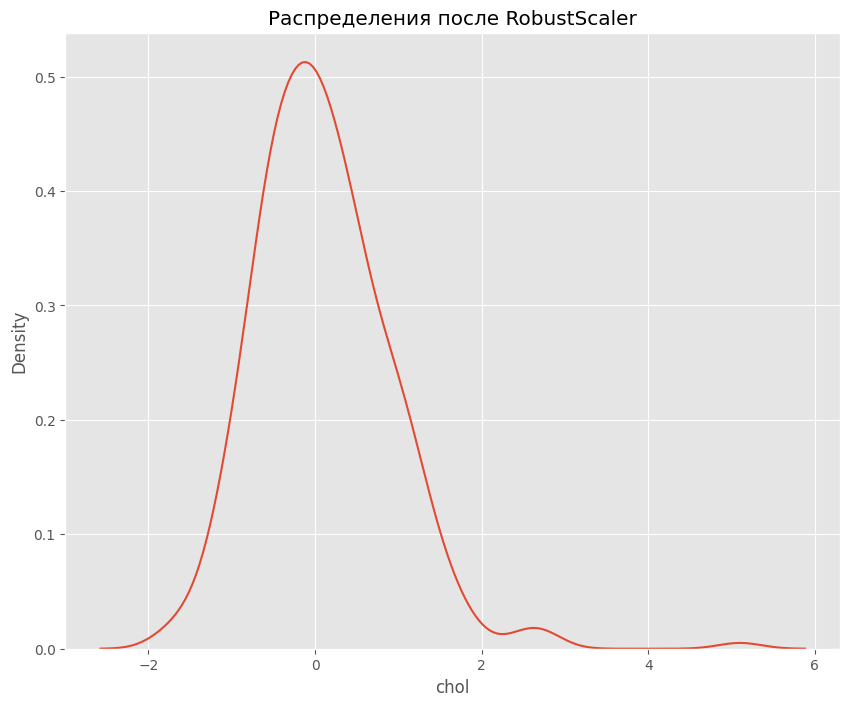

In [92]:
# для нормализации, стандартизации
from sklearn import preprocessing

# инициализируем нормализатор RobustScaler
col_names = list(df_cod.columns)
r_scaler = preprocessing.RobustScaler()

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')



# кодируем исходный датасет
df_r = r_scaler.fit_transform(df_cod)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['chol'], ax=ax1)

In [86]:
print(f"Стандартное отклонение для признака 'chol' равно {round((df_r['chol'].std()), 6)}")

Стандартное отклонение для признака 'chol' равно 0.816232


Код целиком:

In [87]:
# для нормализации, стандартизации
from sklearn import preprocessing

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
col_names = list(heart.columns)

# копируем исходный датасет
heart_r = r_scaler.fit_transform(heart)

heart_r = pd.DataFrame(heart_r, columns=col_names)

# смотрим описательные статистики, ответ 0.816232
heart_r.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,-0.016502,0.081188,0.098646,0.148515,-0.471947,-0.103173,0.326733,0.149752,0.399340,0.729373,0.313531,-0.455446,0.260726
std,0.672748,0.466011,0.516026,0.876907,0.816232,0.356198,0.525860,0.704774,0.469794,0.725672,0.616226,1.022606,0.612277,0.498835,0.439757
min,-1.925926,-1.000000,-0.500000,-1.800000,-1.795276,0.000000,-1.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,-2.000000,-1.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.500000,-0.456693,0.000000,-1.000000,-0.600000,0.000000,-0.500000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.500000,0.543307,0.000000,0.000000,0.400000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.629630,0.000000,1.000000,3.500000,5.102362,1.000000,1.000000,1.507692,1.000000,3.375000,1.000000,4.000000,1.000000,0.000000,1.000000


Объединим наши участки кода в единое целое и посмотрим на корреляцию между признаками на тепловой карте:

<Axes: >

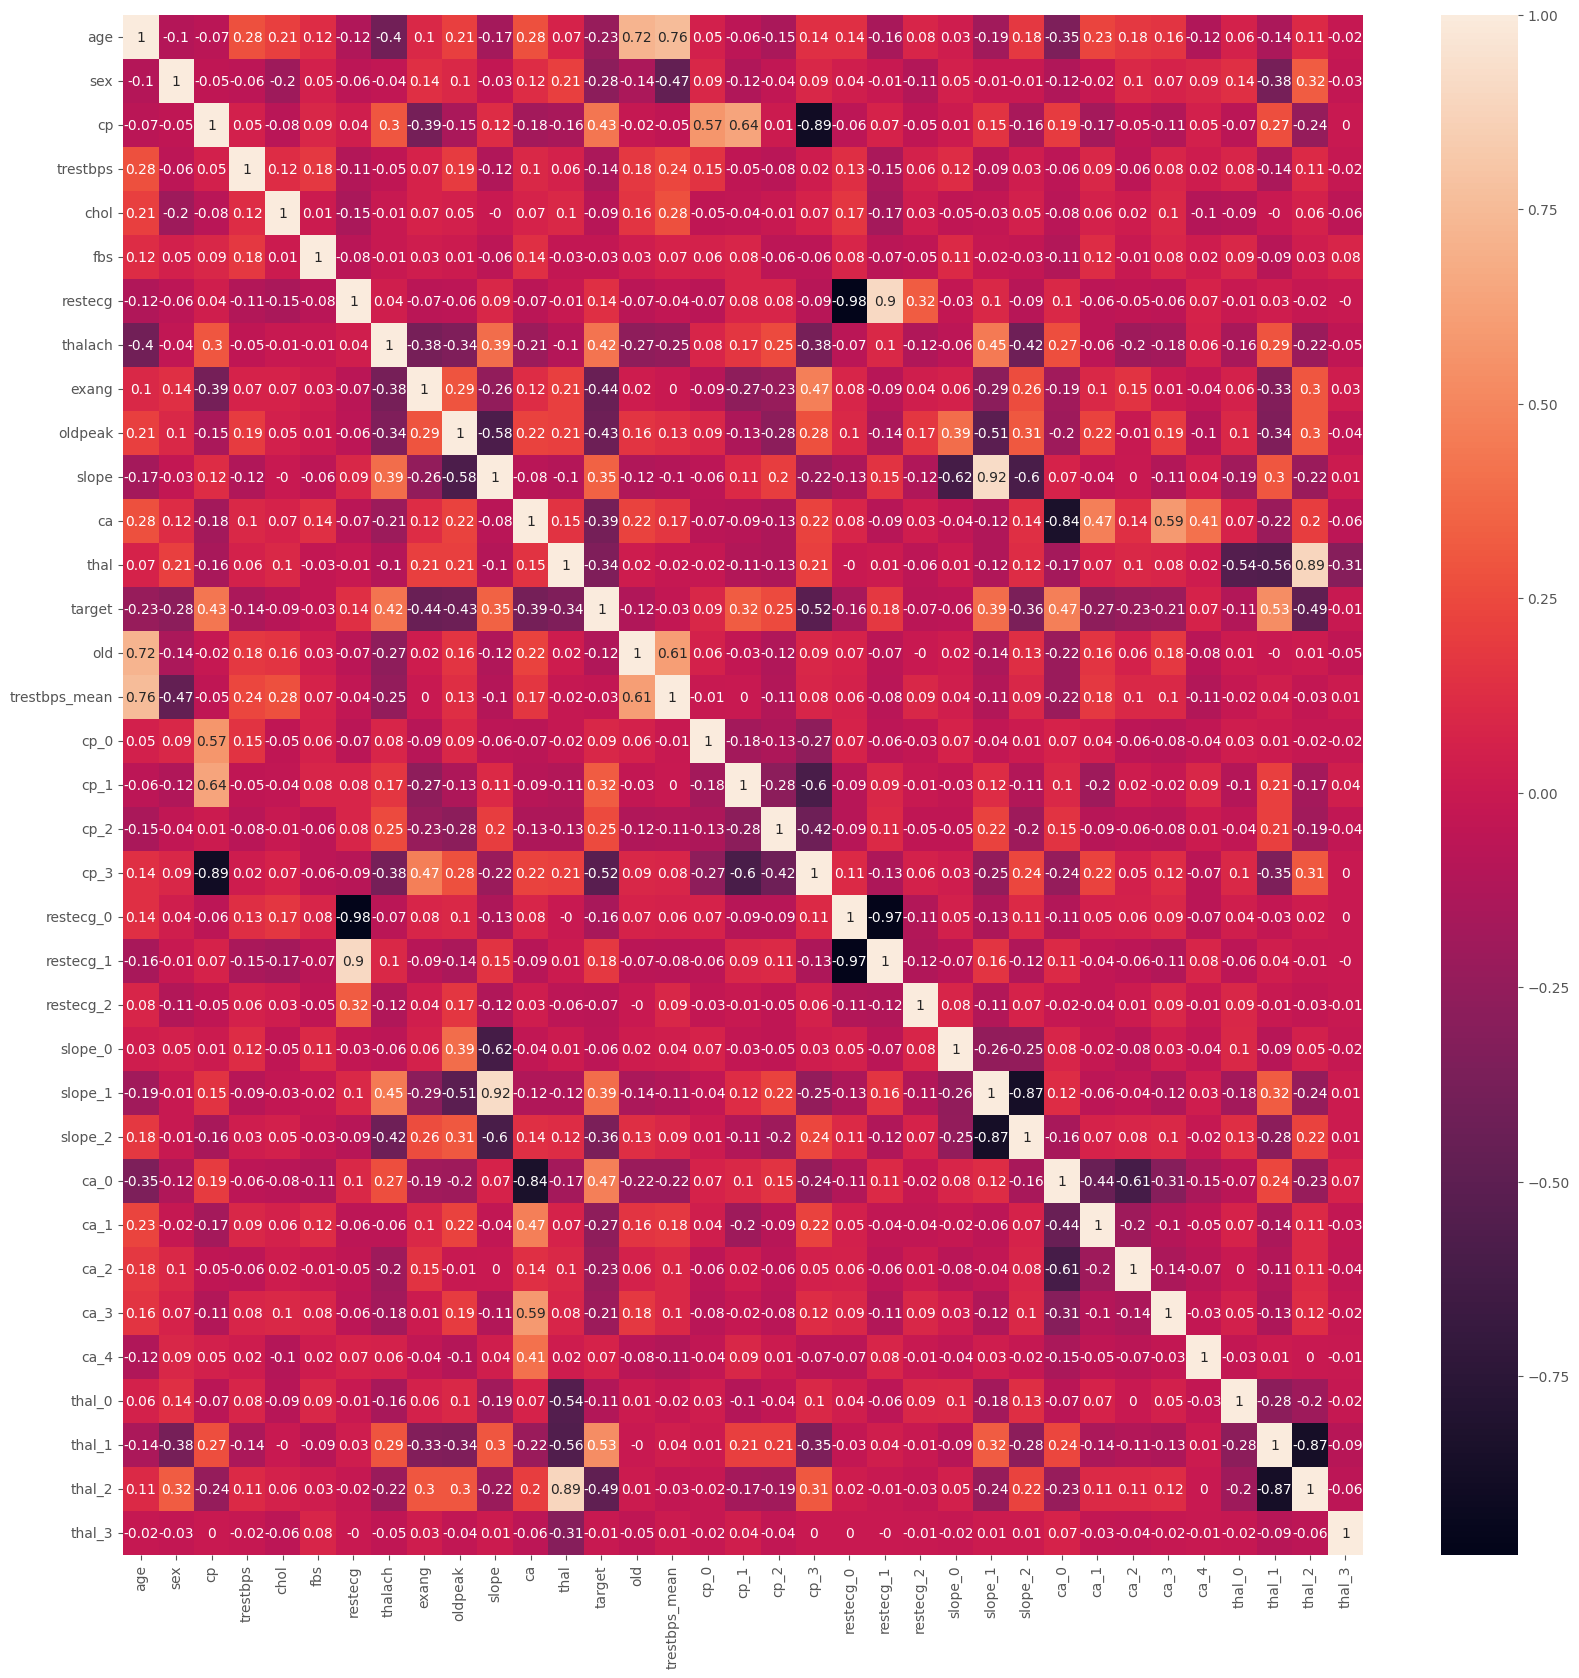

In [103]:
# импортируем необходиые библиотеки
import numpy as np
import pandas as pd

# прочитаем наш датасет
heart = pd.read_csv('data\heart.zip')
# добавляем признак как делали выше
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)

def get_trestbps_mean(row):
    if row['sex'] == 1:
        if row['age'] < 21:
            return '123'
        elif 20 < row['age'] < 31:
            return '126'
        elif 30 < row['age'] < 41:
            return '129'
        elif 40 < row['age'] < 51:
            return '135'
        elif 50 < row['age'] < 61:
            return '142'
        else:
            return '142'
    else:
        if row['age'] < 21:
            return '116'
        elif 20 < row['age'] < 31:
            return '120'
        elif 30 < row['age'] < 41:
            return '127'
        elif 40 < row['age'] < 51:
            return '137'
        elif 50 < row['age'] < 61:
            return '144'
        else:
            return '159'
heart['trestbps_mean'] = heart[['age', 'sex']].apply(get_trestbps_mean, axis=1)
# импортируем для работы с кодировщиком
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
cols = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
# инициализируем нормализатор RobustScaler
col_names = list(df_cod.columns)
r_scaler = preprocessing.RobustScaler()
df_cod = pd.concat([heart, cols], axis=1)
df_r = r_scaler.fit_transform(df_cod)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)
df_r.rename(columns = {'cp_1':'cp_0', 'cp_2':'cp_1', 'cp_3':'cp_2', 'cp_4':'cp_3',
                       'restecg_1':'restecg_0', 'restecg_2':'restecg_1', 'restecg_3':'restecg_2',
                       'slope_1':'slope_0', 'slope_2':'slope_1', 'slope_3':'slope_2',
                       'ca_1':'ca_0', 'ca_2':'ca_1', 'ca_3':'ca_2', 'ca_4':'ca_3', 'ca_5':'ca_4',
                       'thal_1':'thal_0', 'thal_2':'thal_1', 'thal_3':'thal_2', 'thal_4':'thal_3'}, inplace = True )


# импортируем seaborn для построения графиков
import seaborn as sns
# включаем отображение коэффициентов
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(round(df_r.corr(), 2), annot=True) # включаем отображение коэффициентов


Таким образом, у нас получилось преобразовать признаки и произвести некоторый разведывательный анализ.